In [115]:
from tensorboard.backend.event_processing import event_accumulator
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

/home/ki/projects/work/mchad/venv/lib/python3.9/site-packages/tensorboard/plugins/distribution/compressor.py:141: RuntimeWarning: invalid value encountered in double_scalars
  return y0 + (x - x0) * float(y1 - y0) / (x1 - x0)


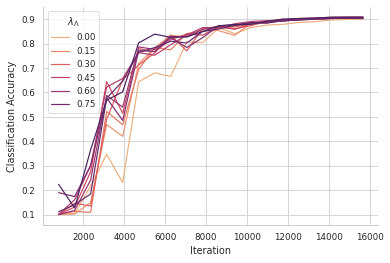

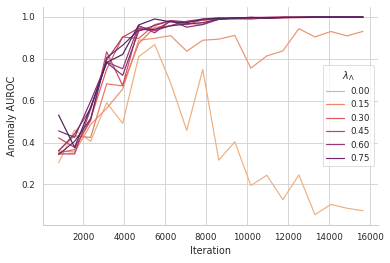

In [116]:
sb.set()
sb.set_style("whitegrid")
sb.set_context("paper")

data = []
dfs = []

for i in range(0, 10):

    path = f"/home/ki/projects/work/mchad/logs/multiruns/mchad-vary-center-weight/{i}/tb/version_0/"
    tb = event_accumulator.EventAccumulator(path)
    tb.Reload()

    data = {}
    for scalar in tb.scalars.Keys():
        a = tb.Scalars(tag=scalar)
        # print(scalar, len(a))

        if len(a) != 20:
            continue
        vals = [a.value for a in a]
        step = [a.step for a in a]
        data[scalar] = vals
        data["step"] = step

    df = pd.DataFrame(data)
    df["$\lambda_{\Lambda}$"] = float(float(i) / 10)
    dfs.append(df)

df = pd.concat(dfs)


sb.lineplot(data=df.reset_index(), x="step", y="Accuracy/val", hue="$\lambda_{\Lambda}$", palette="flare")
plt.xlabel("Iteration")
plt.ylabel("Classification Accuracy")
sb.despine()
plt.savefig("out/center-acc.pgf")
plt.show()

sb.lineplot(data=df.reset_index(), x="step", y="Distance/OSR/AUROC/val", hue="$\lambda_{\Lambda}$", palette="flare")
plt.xlabel("Iteration")
plt.ylabel("Anomaly AUROC")
sb.despine()
plt.savefig("out/center-auroc.pgf")
plt.show()

/home/ki/projects/work/mchad/venv/lib/python3.9/site-packages/tensorboard/plugins/distribution/compressor.py:141: RuntimeWarning: invalid value encountered in double_scalars
  return y0 + (x - x0) * float(y1 - y0) / (x1 - x0)


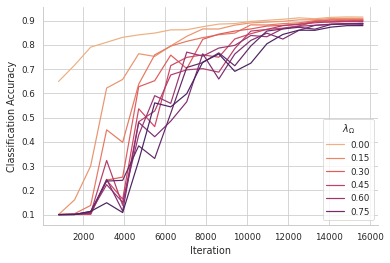

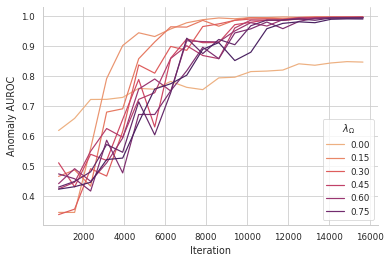

In [117]:

data = []
dfs = []

for i in range(0, 10):

    path = f"/home/ki/projects/work/mchad/logs/multiruns/machad-vary-oe-weight/{i}/tb/version_0/"
    tb = event_accumulator.EventAccumulator(path)
    tb.Reload()

    data = {}
    for scalar in tb.scalars.Keys():
        a = tb.Scalars(tag=scalar)
        # print(scalar, len(a))

        if len(a) != 20:
            continue
        vals = [a.value for a in a]
        step = [a.step for a in a]
        data[scalar] = vals
        data["step"] = step

    df = pd.DataFrame(data)
    df["$\lambda_{\Omega}$"] = float(float(i) / 10)
    dfs.append(df)

df = pd.concat(dfs)

sb.color_palette("rocket")

sb.lineplot(data=df.reset_index(), x="step", y="Accuracy/val", hue="$\lambda_{\Omega}$", palette="flare")
plt.xlabel("Iteration")
plt.ylabel("Classification Accuracy")
sb.despine()
plt.savefig("out/oe-acc.pgf")
plt.show()


sb.lineplot(data=df.reset_index(), x="step", y="Distance/OSR/AUROC/val", hue="$\lambda_{\Omega}$", palette="flare")
plt.xlabel("Iteration")
plt.ylabel("Anomaly AUROC")
sb.despine()
plt.savefig("out/oe-auroc.pgf")
plt.show()

## Generate Result Tables
- MCHAD
- CAC

In [118]:
from os.path import join
dataset_map = {
    "test_vs_uniformnoise": "Gauss",
    "test_vs_gaussiannoise": "Uniform",
    "test_vs_tinycrop": "Tiny Crop",
    "test_vs_tinyresize": "Tiny Resize",
    "test_vs_lsuncrop": "LSUN Crop",
    "test_vs_lsunresize": "LSUN Resize",
    "test_vs_textures": "Texture",
}

In [119]:
def convert(df, key="Distance"):
    df = df.set_index(["Dataset", "Outliers", "Model"]).sort_index()[[
        "Accuracy/test",
        f"{key}/OSR/AUROC/test",
        f"{key}/OSR/AUPR-IN/test",
        f"{key}/OSR/AUPR-OUT/test",
        f"{key}/OSR/FPR@95TPR/test"]].dropna()

    df.rename(inplace=True, columns={
        "Accuracy/test": "Accuracy",
        f"{key}/OSR/AUROC/test": "AUROC",
        f"{key}/OSR/AUPR-IN/test": "AUPR-IN",
        f"{key}/OSR/AUPR-OUT/test": "AUPR-OUT",
        f"{key}/OSR/FPR@95TPR/test": "FPR@95TPR",
    })

    return df


### Results for MCHAD Loss

In [120]:
dfs_mchad = []

for i in range(10):
    path = f"/home/ki/projects/work/mchad/logs/multiruns/mchad-run-10x/{i}/results.csv"
    df_mchad = pd.read_csv(path)
    df_mchad["Outliers"] = df_mchad["test_case_name"].apply(dataset_map.get)
    df_mchad["Model"] = "MCHAD"
    df_mchad["Dataset"] = "CIFAR-10"
    dfs_mchad.append(convert(df_mchad))

for i in range(10):
    path = f"/home/ki/projects/work/mchad/logs/multiruns/svhn-mchad-run-10x/{i}/results.csv"
    df_mchad = pd.read_csv(path)
    df_mchad["Outliers"] = df_mchad["test_case_name"].apply(dataset_map.get)
    df_mchad["Model"] = "MCHAD"
    df_mchad["Dataset"] = "SVHN"
    dfs_mchad.append(convert(df_mchad))

df_mchad = pd.concat(dfs_mchad)

df_mchad

Accuracy     AUROC   AUPR-IN  AUPR-OUT  FPR@95TPR
Dataset  Outliers    Model                                                   
CIFAR-10 Gauss       MCHAD  0.896600  0.999509  0.999696  0.999072   0.000000
         LSUN Crop   MCHAD  0.896600  0.658661  0.534936  0.778134   0.463800
         LSUN Resize MCHAD  0.896600  0.999475  0.999679  0.998996   0.000000
         Texture     MCHAD  0.896600  0.916929  0.877915  0.932866   0.123404
         Tiny Crop   MCHAD  0.896600  0.840477  0.692792  0.906497   0.206400
...                              ...       ...       ...       ...        ...
SVHN     LSUN Resize MCHAD  0.927128  0.999188  0.999736  0.996386   0.000000
         Texture     MCHAD  0.927128  0.998418  0.999558  0.990687   0.000532
         Tiny Crop   MCHAD  0.927128  0.983994  0.986947  0.971863   0.038100
         Tiny Resize MCHAD  0.927128  0.999191  0.999736  0.996511   0.000000
         Uniform     MCHAD  0.927128  0.999195  0.999745  0.995701   0.000000

[140 rows x 5 columns]

## MCHAD without Supervision

In [121]:
path = "/home/ki/projects/work/mchad/logs/multiruns/machad-vary-oe-weight/0/results.csv"
dfs_mchad_o = []

df = pd.read_csv(path)
df["Outliers"] = df["test_case_name"].apply(dataset_map.get)
df["Model"] = "MCHAD-O"
df["Dataset"] = "CIFAR-10"
df = convert(df)
df.append(df)

for i in range(10):
    path = f"/home/ki/projects/work/mchad/logs/multiruns/svhn-mchad-no-oe-run-10x/{i}/results.csv"
    df = pd.read_csv(path)
    df["Outliers"] = df["test_case_name"].apply(dataset_map.get)
    df["Model"] = "MCHAD-O"
    df["Dataset"] = "SVHN"
    dfs_mchad_o.append(convert(df))

df_mchad_o = pd.concat(dfs_mchad_o)

### Results for CAC Loss


In [122]:

dfs_cac = []
path = "/home/ki/projects/work/mchad/logs/multiruns/cac-loss-run-0/0/results.csv"
df = pd.read_csv(path)
df["Outliers"] = df["test_case_name"].apply(dataset_map.get)
df["Model"] = "CAC"
df["Dataset"] = "CIFAR-10"
df = convert(df)
dfs_cac.append(df)

for i in range(10):
    path = f"/home/ki/projects/work/mchad/logs/multiruns/svhn-cac-run-10x/{i}/results.csv"
    df = pd.read_csv(path)
    df["Outliers"] = df["test_case_name"].apply(dataset_map.get)
    df["Model"] = "CAC"
    df["Dataset"] = "SVHN"
    df = convert(df)
    dfs_cac.append(df)

df_cac = pd.concat(dfs_cac)

# TODO: probably should not have taken mit but max, results are
#  actually better when we invert them
# df_cac["AUROC"] = 1 - df_cac["AUROC"]

In [123]:
df_cac

Accuracy     AUROC   AUPR-IN  AUPR-OUT  FPR@95TPR
Dataset  Outliers    Model                                                   
CIFAR-10 Gauss       CAC    0.904200  0.443156  0.426151  0.527975   0.880500
         LSUN Crop   CAC    0.904200  0.506293  0.449989  0.640627   0.680900
         LSUN Resize CAC    0.904200  0.545350  0.471292  0.655467   0.692200
         Tiny Crop   CAC    0.904200  0.509003  0.451269  0.638632   0.686100
         Tiny Resize CAC    0.904200  0.478193  0.438802  0.595251   0.762700
...                              ...       ...       ...       ...        ...
SVHN     LSUN Resize CAC    0.956246  0.596597  0.693388  0.609526   0.473600
         Texture     CAC    0.956246  0.654559  0.810337  0.591097   0.410816
         Tiny Crop   CAC    0.956246  0.733605  0.764456  0.745387   0.316400
         Tiny Resize CAC    0.956246  0.618403  0.704111  0.629069   0.452000
         Uniform     CAC    0.956246  0.764342  0.787193  0.757440   0.296300

[76 rows x 5 columns]

### Results for II Loss


In [124]:
dfs_ii = []

for i in range(10):
    path = f"/home/ki/projects/work/mchad/logs/multiruns/svhn-ii-loss-run-10x/{i}/results.csv"
    df = pd.read_csv(path)
    df["Outliers"] = df["test_case_name"].apply(dataset_map.get)
    df["Model"] = "II"
    df["Dataset"] = "SVHN"
    df = convert(df)
    dfs_ii.append(df)

for i in range(9):
    path = f"/home/ki/projects/work/mchad/logs/multiruns/ii-loss-run-10x/{i}/results.csv"
    df = pd.read_csv(path)
    df["Outliers"] = df["test_case_name"].apply(dataset_map.get)
    df["Model"] = "II"
    df["Dataset"] = "CIFAR-10"
    df = convert(df)
    dfs_ii.append(df)

df_ii = pd.concat(dfs_ii)

### Results for Center Loss

In [125]:
dfs_center = []

for i in range(10):
    path = f"/home/ki/projects/work/mchad/logs/multiruns/svhn-center-run-10x/{i}/results.csv"
    df = pd.read_csv(path)
    df["Outliers"] = df["test_case_name"].apply(dataset_map.get)
    df["Model"] = "Center"
    df["Dataset"] = "SVHN"
    df = convert(df, key="Softmax")
    dfs_center.append(df)

for i in range(9):
    path = f"/home/ki/projects/work/mchad/logs/multiruns/center-run-10x/{i}/results.csv"
    df = pd.read_csv(path)
    df["Outliers"] = df["test_case_name"].apply(dataset_map.get)
    df["Model"] = "Center"
    df["Dataset"] = "CIFAR-10"
    df = convert(df, key="Softmax")
    dfs_center.append(df)

df_center = pd.concat(dfs_center)



### Results for Softmax


In [126]:
dfs_softmax = []
dfs_energy = []

for i in range(10):
    # path = "/home/ki/projects/work/mchad/logs/multiruns/softmax-run-0/0/results.csv"
    path = f"/home/ki/projects/work/mchad/logs/multiruns/softmax-run-10x/{i}/results.csv"
    df_softmax = pd.read_csv(path)
    df_softmax["Outliers"] = df_softmax["test_case_name"].apply(dataset_map.get)
    df_softmax["Model"] = "Softmax"
    df_softmax["Dataset"] = "CIFAR-10"
    df_softmax = df_softmax.set_index(["Dataset", "Outliers", "Model"]).sort_index()[[
        "Accuracy/test",
        "Softmax/OSR/AUROC/test",
        "Softmax/OSR/AUPR-IN/test",
        "Softmax/OSR/AUPR-OUT/test",
        "Softmax/OSR/FPR@95TPR/test"]].dropna()

    df_softmax.rename(inplace=True, columns={
        "Accuracy/test": "Accuracy",
        "Softmax/OSR/AUROC/test": "AUROC",
        "Softmax/OSR/AUPR-IN/test": "AUPR-IN",
        "Softmax/OSR/AUPR-OUT/test": "AUPR-OUT",
        "Softmax/OSR/FPR@95TPR/test": "FPR@95TPR",
    })

    dfs_softmax.append(df_softmax)

    # path = "/home/ki/projects/work/mchad/logs/multiruns/softmax-run-0/0/results.csv"
    df_energy = pd.read_csv(path)
    df_energy["Outliers"] = df_energy["test_case_name"].apply(dataset_map.get)
    df_energy["Model"] = "EBM"
    df_energy["Dataset"] = "CIFAR-10"

    df_energy = df_energy.set_index(["Dataset", "Outliers", "Model"]).sort_index()[[
        "Accuracy/test",
        "EnergyBased/OSR/AUROC/test",
        "EnergyBased/OSR/AUPR-IN/test",
        "EnergyBased/OSR/AUPR-OUT/test",
        "EnergyBased/OSR/FPR@95TPR/test"]].dropna()

    df_energy.rename(inplace=True, columns={
        "Accuracy/test": "Accuracy",
        "EnergyBased/OSR/AUROC/test": "AUROC",
        "EnergyBased/OSR/AUPR-IN/test": "AUPR-IN",
        "EnergyBased/OSR/AUPR-OUT/test": "AUPR-OUT",
        "EnergyBased/OSR/FPR@95TPR/test": "FPR@95TPR",
    })

    dfs_energy.append(df_energy)


for i in range(10):
    # path = "/home/ki/projects/work/mchad/logs/multiruns/softmax-run-0/0/results.csv"
    path = f"/home/ki/projects/work/mchad/logs/multiruns/svhn-softmax-run-10x/{i}/results.csv"
    df_softmax = pd.read_csv(path)
    df_softmax["Outliers"] = df_softmax["test_case_name"].apply(dataset_map.get)
    df_softmax["Model"] = "Softmax"
    df_softmax["Dataset"] = "SVHN"
    df_softmax = df_softmax.set_index(["Dataset", "Outliers", "Model"]).sort_index()[[
        "Accuracy/test",
        "Softmax/OSR/AUROC/test",
        "Softmax/OSR/AUPR-IN/test",
        "Softmax/OSR/AUPR-OUT/test",
        "Softmax/OSR/FPR@95TPR/test"]].dropna()

    df_softmax.rename(inplace=True, columns={
        "Accuracy/test": "Accuracy",
        "Softmax/OSR/AUROC/test": "AUROC",
        "Softmax/OSR/AUPR-IN/test": "AUPR-IN",
        "Softmax/OSR/AUPR-OUT/test": "AUPR-OUT",
        "Softmax/OSR/FPR@95TPR/test": "FPR@95TPR",
    })

    dfs_softmax.append(df_softmax)

    # path = "/home/ki/projects/work/mchad/logs/multiruns/softmax-run-0/0/results.csv"
    df_energy = pd.read_csv(path)
    df_energy["Outliers"] = df_energy["test_case_name"].apply(dataset_map.get)
    df_energy["Model"] = "EBM"
    df_energy["Dataset"] = "SVHN"

    df_energy = df_energy.set_index(["Dataset", "Outliers", "Model"]).sort_index()[[
        "Accuracy/test",
        "EnergyBased/OSR/AUROC/test",
        "EnergyBased/OSR/AUPR-IN/test",
        "EnergyBased/OSR/AUPR-OUT/test",
        "EnergyBased/OSR/FPR@95TPR/test"]].dropna()

    df_energy.rename(inplace=True, columns={
        "Accuracy/test": "Accuracy",
        "EnergyBased/OSR/AUROC/test": "AUROC",
        "EnergyBased/OSR/AUPR-IN/test": "AUPR-IN",
        "EnergyBased/OSR/AUPR-OUT/test": "AUPR-OUT",
        "EnergyBased/OSR/FPR@95TPR/test": "FPR@95TPR",
    })

    dfs_energy.append(df_energy)

df_softmax = pd.concat(dfs_softmax)
df_energy = pd.concat(dfs_energy)

In [127]:
df = pd.concat([df_mchad, df_mchad_o, df_cac, df_center, df_softmax, df_energy, df_ii])

# print(tmp.to_latex())

In [128]:
print(df_mchad)
print(df)

                            Accuracy     AUROC   AUPR-IN  AUPR-OUT  FPR@95TPR
Dataset  Outliers    Model                                                   
CIFAR-10 Gauss       MCHAD  0.896600  0.999509  0.999696  0.999072   0.000000
         LSUN Crop   MCHAD  0.896600  0.658661  0.534936  0.778134   0.463800
         LSUN Resize MCHAD  0.896600  0.999475  0.999679  0.998996   0.000000
         Texture     MCHAD  0.896600  0.916929  0.877915  0.932866   0.123404
         Tiny Crop   MCHAD  0.896600  0.840477  0.692792  0.906497   0.206400
...                              ...       ...       ...       ...        ...
SVHN     LSUN Resize MCHAD  0.927128  0.999188  0.999736  0.996386   0.000000
         Texture     MCHAD  0.927128  0.998418  0.999558  0.990687   0.000532
         Tiny Crop   MCHAD  0.927128  0.983994  0.986947  0.971863   0.038100
         Tiny Resize MCHAD  0.927128  0.999191  0.999736  0.996511   0.000000
         Uniform     MCHAD  0.927128  0.999195  0.999745  0.9957

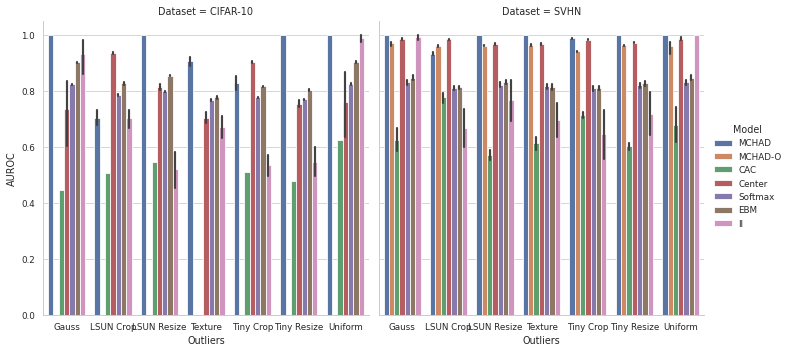

In [129]:
# fig, ax = plt.subplots(figsize=(10,5))
g = sb.catplot(data=df.reset_index(), x="Outliers", y="AUROC", hue="Model", orient="v", col="Dataset", kind="bar")

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# g.xlabel("Outlier Dataset")
# g.ylabel("Anomaly Detection AUROC (%)")
# plt.tight_layout()
plt.savefig(f"out/res.pgf", dpi=300)

In [130]:
df["AUROC"] = df["AUROC"].apply(lambda x: x * 100)
df["AUPR-IN"] = df["AUPR-IN"].apply(lambda x: x * 100)
df["AUPR-OUT"] = df["AUPR-OUT"].apply(lambda x: x * 100)
df["FPR@95TPR"] = df["FPR@95TPR"].apply(lambda x: x * 100)
df["Accuracy"] = df["Accuracy"].apply(lambda x: x * 100)

In [131]:
# print(df.sort_index().to_latex(float_format="%.2f", multirow=True, escape=False, label="tab:results"))

In [132]:

print(df.reset_index().groupby(by=["Dataset", "Model"]).mean().to_latex(float_format="%.2f", multirow=True, escape=False, label="tab:results"))

\begin{table}
\centering
\label{tab:results}
\begin{tabular}{llrrrrr}
\toprule
     &         &  Accuracy &  AUROC &  AUPR-IN &  AUPR-OUT &  FPR@95TPR \\
Dataset & Model &           &        &          &           &            \\
\midrule
\multirow{6}{*}{CIFAR-10} & CAC &     90.42 &  51.78 &    46.85 &     61.44 &      76.18 \\
     & Center &     88.96 &  79.99 &    83.31 &     75.12 &      71.09 \\
     & EBM &     87.82 &  83.91 &    84.88 &     81.29 &      61.75 \\
     & II &     29.18 &  69.82 &    70.95 &     67.86 &      66.71 \\
     & MCHAD &     89.46 &  91.91 &    87.39 &     94.65 &      11.36 \\
     & Softmax &     87.82 &  79.12 &    81.86 &     73.47 &      79.00 \\
\cline{1-7}
\multirow{7}{*}{SVHN} & CAC &     95.68 &  65.37 &    73.78 &     65.10 &      41.18 \\
     & Center &     95.48 &  97.67 &    99.13 &     92.32 &      12.46 \\
     & EBM &     89.33 &  82.63 &    92.76 &     59.18 &      76.03 \\
     & II &     12.91 &  78.33 &    89.43 &     62.35 &      